In [1]:
!pip install -qU langchain langsmith langchain-core langchain-community langchain-experimental langchain-openai langchain-groq pypdf langchain-text-splitters langchain-chroma faiss-cpu sentence_transformers google-search-results wikipedia duckduckgo-search arxiv langgraph

# Import Libraries

In [2]:
import os
from google.colab import userdata
os.environ['GROQ_API_KEY'] = userdata.get('GROQ_API_KEY')
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')
os.environ['HUGGINGFACEHUB_API_TOKEN'] = userdata.get('HUGGINGFACEHUB_API_TOKEN')
os.environ['LANGSMITH_API_KEY'] = userdata.get('LANGSMITH_API_KEY')
os.environ['PINECONE_API_KEY'] = userdata.get('PINECONE_API_KEY')
os.environ['SERPAPI_API_KEY'] = userdata.get('SERPAPI_API_KEY')

# Set up Langsmith

In [3]:
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGSMITH_API_KEY')
os.environ["LANGCHAIN_PROJECT"] = "langgraph_learning"

### [How langchain agent works internally (Trace by using LangSmith)](https://medium.com/@terrycho/how-langchain-agent-works-internally-trace-by-using-langsmith-df23766e7fb4)

# ReAct Agents and Function Calling Agent.

React agents and function calling agents are two distinct approaches to leveraging Large Language Models (LLMs) for automating tasks. Both methods aim to integrate LLMs with external tools and systems, but they differ in their underlying logic and implementation.

### React Agent

A React agent combines reasoning and action in a continuous loop. The LLM “thinks” about the problem, decides the steps to be taken, allows the agent to take action based on its reasoning, and then observes the result to refine its understanding. This approach relies on “**ReACT prompting**,” which involves crafting prompts that guide the LLM to alternate between reasoning and action steps.

### Key features of React agents:

**Reasoning and action loop**: The agent continuously reasons about the task, decides on actions, and observes the outcomes to refine its understanding.

**ReACT prompting:** The agent uses specific prompting techniques to guide the LLM’s reasoning and action steps.

**Agent types**: React agents are tailored for specific tasks and utilize CoT (Conversational Task) and ReACT prompting.

**Strengths**: Suitable for tasks requiring multi-step reasoning, complex planning, and understanding of context.

**Limitations**: Can be computationally expensive due to the reasoning steps involved and requires more effort to define prompts and actions. Function Calling Agent.

---
### Function calling agent
A function calling agent, introduced by OpenAI, allows LLMs to understand a pre-defined format of a function (JSON structure) as part of a user prompt and intelligently choose to output a JSON object containing arguments to call a function (tool in an agent). This approach relies on pre-defined functions and their parameters.

### Key features of function calling agents:

Pre-defined functions: The agent uses pre-defined functions with well-defined parameters and outputs.

JSON-based input: The agent receives JSON objects containing function names and arguments.

Agent simplicity: Function calling agents are generally easier to implement, relying on pre-defined functions and parameters.

Strengths: Excels at integrating LLMs with external systems and performing specific tasks through well-defined functions.

Limitations: Less suitable for open-ended tasks where actions are not pre-defined. Comparison


---
In summary, React agents are suitable for tasks requiring complex reasoning and planning, while function calling agents excel at integrating LLMs with external systems and performing specific tasks through well-defined functions. The choice between these two approaches depends on the nature of the task and the desired level of automation.

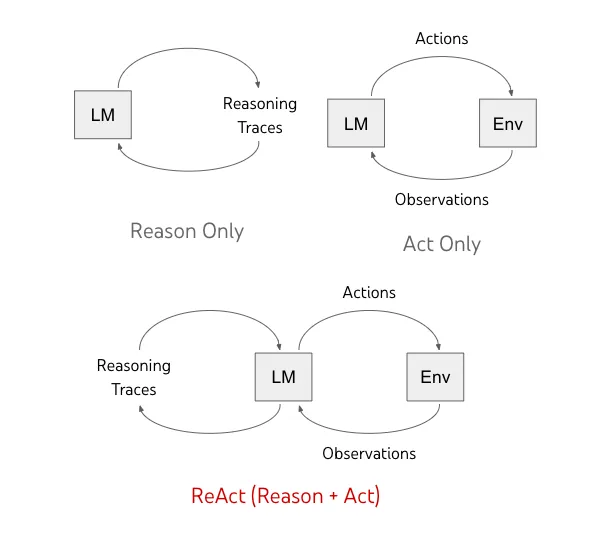

# Agent execution detailed structure

When a question comes in, insert this question into the agent prompt created earlier and deliver it to the agent.

To answer a question, the agent refers to the guide in the agent prompt and creates the necessary question (corresponds to Question 1: Action Input) through the thought process. After receiving the answer (corresponding to Answer 1: Observation) by calling the Tool (corresponding to Action) that selected the question, append the answer to agent_scratchpad of the existing agent prompt (Agent prompt)

The agent executor passes this agent prompt back to the agent, creates question 2 in the same order, receives the answer answer2, and similarly appends it to the existing agent prompt.

When agent_executor passes this prompt to the agent again, if enough information necessary for the answer has been collected, the agent generates an answer based on the information in the prompt and returns the final answer.




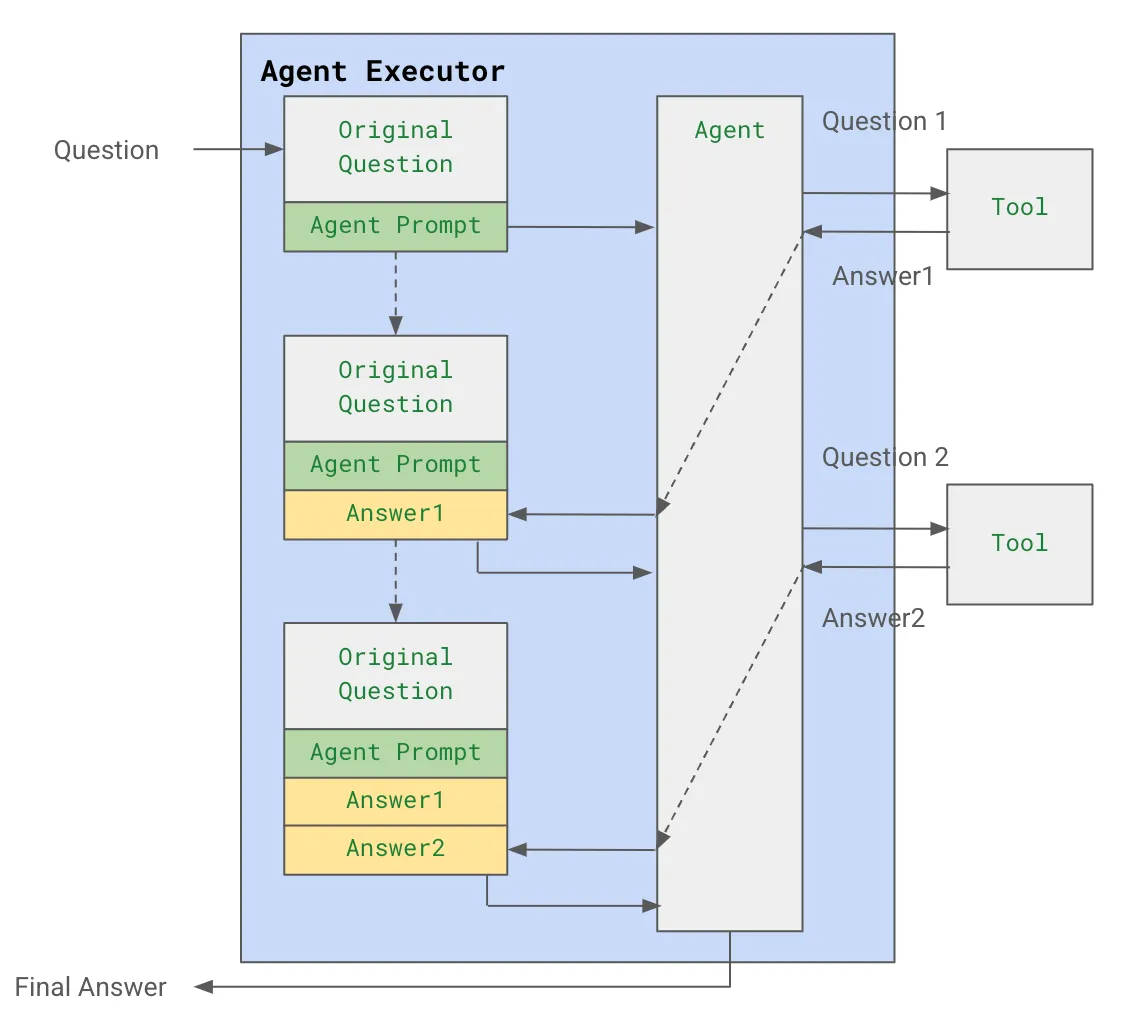

In [4]:
from langchain_groq import ChatGroq

llm = ChatGroq(model = 'llama-3.1-8b-instant')

# Basics

## Invoke LLM

[Messages](https://python.langchain.com/v0.1/docs/modules/model_io/chat/quick_start/)

In [5]:
llm.invoke('Hello')

AIMessage(content='Hello.  Is there something I can help you with today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 36, 'total_tokens': 50, 'completion_time': 0.018666667, 'prompt_time': 0.003379918, 'queue_time': 0.01738251, 'total_time': 0.022046585}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f66ccb39ec', 'finish_reason': 'stop', 'logprobs': None}, id='run-e96e65fe-0055-4686-893c-6eb233e2ca9a-0', usage_metadata={'input_tokens': 36, 'output_tokens': 14, 'total_tokens': 50})

In [6]:
# Adding Model Behaviour

message=[{"role":"system","content":"you are a helpful assistant"},
         {"role":"user","content":"hi how are you?"}]

result = llm.invoke(message)
print(result.content)

I'm doing well, thank you for asking. I'm a helpful assistant, here to assist you with any questions or tasks you may have. How can I help you today?


In [8]:
# Updated Version
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage(content="You're a helpful assistant"),
    HumanMessage(content="What is the purpose of model regularization?"),
]


result = llm.invoke(messages)
print(result.content)

The primary purpose of model regularization is to prevent overfitting in a machine learning model. Overfitting occurs when a model is too complex and fits the noise in the training data, resulting in poor performance on new, unseen data.

Model regularization serves several purposes:

1. **Reduces overfitting**: Regularization adds a penalty term to the loss function to discourage complex models. This helps the model to generalize better and avoid fitting the noise in the training data.
2. **Encourages simplicity**: Regularization promotes simplicity in the model by adding a penalty for large weights. This prevents the model from relying too heavily on any single feature or parameter.
3. **Improves generalization**: By reducing overfitting, regularization helps the model to generalize better to new, unseen data.
4. **Prevents over-specialization**: Regularization prevents the model from becoming too specialized to the training data, making it more robust to changes in the data or new d

## Understading Classes

###` __call__` and `__str__`

The two methods are part of a class in Python. I'll explain them one by one and then how they fit together.

1. `__call__(self, message)`
This method defines the behavior of calling an instance of the class like a function. In Python, the `__call__` method allows instances of a class to be "called" directly, just as if they were functions.

* self: Refers to the instance of the class that this method is called on.
* message: A parameter that will be passed when the instance is called.

What this does:
* When an instance of the class is called, it appends the given message to the instance's history attribute.
* It prints the string "Car works with self start" to indicate that the instance was called and the method executed.


For example, if you had an object `car = Car()` (assuming Car is the class name), and then did `car("Engine started")`, the following would happen:

1. The message "Engine started" would be appended to the history attribute of car.
2. The string "Car works with self start" would be printed.

This gives the class behavior similar to a function, while still retaining all the characteristics of an object.

---

2. `__str__(self) -> str`
The `__str__` method in Python is a special method that defines the "string representation" of an object. When you call **str(instance) or use print(instance)**, this method will be invoked to return a string that represents the object.

* self: Refers to the instance of the class.

What this does:
* The method returns the value of the description attribute when you try to convert the instance to a string.

For example, if you do `print(car)` and the `__str__` method is implemented like this, it will print the value of `car.description`.

### In a Class Context
Here’s how this would look in a class:

```
class Car:
    def __init__(self, description):
        self.description = description  # Description of the car
        self.history = []  # List to store the history of messages

    def __call__(self, message):
        self.history.append(message)  # Append the message to the history
        print("Car works with self start")

    def __str__(self) -> str:
        return self.description  # Return the description when printed
```


Example Usage:

```
car = Car("A fast red car")
print(car)  # Output: A fast red car

car("Engine started")  # Output: Car works with self start
print(car.history)  # Output: ['Engine started']
```

Summary:
* The `__call__` method allows instances of the class to be called like functions, appending messages to a history list and printing a message when called.
* The `__str__` method provides a custom string representation of the object, which is used when you try to print or convert the object to a string.

In [27]:
class Car:
  def __init__(self, description = "") -> None:
    self.description = description
    self.history = []

  def __str__(self) -> str:
    print("used print instance")
    return self.description

  def __call__(self, message):
    self.history.append(message)
    print("Car works with self start")

  def execute(self, message):
    self.history.append(message)
    print("Car works with manual start")

In [28]:
obj = Car()

In [29]:
print(obj) # Nothing will get printed since we didnt pass any description

used print instance



In [30]:
obj = Car("A fast red car") # Here we are passing a description
# In our LLM code, we can consider this to be as Models Behaviour

In [31]:
print(obj) # Print will use __str__ function

used print instance
A fast red car


In [32]:
# __call__ method allows instances of a class to be "called" directly
obj("I can start my car with press of button") # I can directly call my obj

Car works with self start


In [33]:
obj.execute("I need to use my key to power up my car") # We need to call the function

Car works with manual start


In [34]:
# Difference
obj("I can start my car with press of button") # Runs the instances directly
obj.execute("I need to use my key to power up my car") # Need to call the method

Car works with self start
Car works with manual start


## Understanding Regular Expression



### Pattern Breakdown:

* `^`: This matches the start of a string. It means the string must begin with what follows.
  * Action:: This is a literal match. It means the string must have the text "Action:" at the beginning.

* `(\w+)`:
  1. The parentheses () define a capture group. This allows you to extract part of the string that matches this section.
  2. `\w+` matches one or more word characters (letters, digits, and underscores). This will capture a word that follows "Action:".

* `:`: This is a literal colon that separates the word matched by (`\w+`) from the rest of the string.

* `(.*)`:
  * This is another capture group, where `.*` matches any character `(.)` zero or more times `(*)`, which means it captures everything that comes after the second colon.

### What does it do?
This regex is looking for a string that:
  1. Starts with the text "Action:".
  2. Has a word right after it, separated by a colon.
  3. Then, after another colon, it captures everything that follows.

---

In [36]:
import re

# Compiling the regular expression pattern
action_re = re.compile('^Action: (\w+): (.*)') # Extract the action and observation from the prompt

# Sample strings
text1 = "Action: tool: North"
text2 = "Action: tool: High"
text3 = "Error: Not an Action"

In [37]:
# Testing the pattern
match1 = action_re.match(text1)

In [43]:
match1

<re.Match object; span=(0, 19), match='Action: tool: North'>

In [44]:
match1[0] # There is a match

'Action: tool: North'

In [50]:
print(match1.group()) # This will give out the complete match
print(match1.group(1)) # Second word -> The tool to use
print(match1.group(2)) # Third word -> The observation

Action: tool: North
tool
North


In [51]:
match3 = action_re.match(text3)

In [54]:
match3 # This will be empty because there is no match

In [55]:
if match3:
  print(match3.group())
  print(match3.group(1))
  print(match3.group(2))
else:
  print("No match found")

No match found


In [56]:
match2 = action_re.match(text2)

if match2:
  print(match2.group())
  print(match2.group(1))
  print(match2.group(2))
else:
  print("No match found")

Action: tool: High
tool
High


## Tools

In [57]:
from langchain_community.tools import DuckDuckGoSearchRun

search = DuckDuckGoSearchRun()

In [58]:
search.invoke("What is the capital of India?")

/usr/local/lib/python3.10/dist-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: backend='api' is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(


"New Delhi, national capital of India. It is situated in the north-central part of the country on the west bank of the Yamuna River, adjacent to and just south of Delhi city (Old Delhi) and within the Delhi national capital territory. Learn more about New Delhi in this article. Delhi is a city and national capital territory in north-central India. The city of Delhi actually consists of two components: Old Delhi, in the north, the historic city; and New Delhi, in the south, since 1947 the capital of India, built in the first part of the 20th century as the capital of British India. India, country that occupies the greater part of South Asia.It is made up of 28 states and eight union territories, and its national capital is New Delhi, built in the 20th century just south of the historic hub of Old Delhi to serve as India's administrative center.Its government is a constitutional republic that represents a highly diverse population consisting of thousands of ethnic ... The capital city of

In [81]:
result = search.invoke("What is the capital of India?")

/usr/local/lib/python3.10/dist-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: backend='api' is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(


In [82]:
result

"New Delhi, national capital of India. It is situated in the north-central part of the country on the west bank of the Yamuna River, adjacent to and just south of Delhi city (Old Delhi) and within the Delhi national capital territory. Learn more about New Delhi in this article. Delhi is a city and national capital territory in north-central India. The city of Delhi actually consists of two components: Old Delhi, in the north, the historic city; and New Delhi, in the south, since 1947 the capital of India, built in the first part of the 20th century as the capital of British India. India, country that occupies the greater part of South Asia.It is made up of 28 states and eight union territories, and its national capital is New Delhi, built in the 20th century just south of the historic hub of Old Delhi to serve as India's administrative center.Its government is a constitutional republic that represents a highly diverse population consisting of thousands of ethnic ... The capital city of

In [59]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

wikipedia = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())

In [61]:
wikipedia.invoke("Who is Kobe Bryant")

"Page: Kobe Bryant\nSummary: Kobe Bean Bryant ( KOH-bee; August 23, 1978 – January 26, 2020) was an American professional basketball player. A shooting guard, he spent his entire 20-year career with the Los Angeles Lakers in the National Basketball Association (NBA). Widely regarded as one of the sport's greatest and most influential players of all time, Bryant won five NBA championships and was an 18-time All-Star, 15-time member of the All-NBA Team, 12-time member of the All-Defensive Team, the 2008 NBA Most Valuable Player (MVP), and a two-time NBA Finals MVP. He ranks fourth in league all-time regular season and postseason scoring. Bryant was posthumously voted into the Naismith Memorial Basketball Hall of Fame in 2020 and named to the NBA 75th Anniversary Team in 2021.\nThe son of NBA player Joe Bryant, Bryant was born in Philadelphia and partly raised in Italy. Recognized as the top American high-school basketball player while at Philadelphia suburb Lower Merion, Bryant declared 

In [66]:
result = wikipedia.invoke("Who is Kobe Bryant")

In [72]:
print(result)

Page: Kobe Bryant
Summary: Kobe Bean Bryant ( KOH-bee; August 23, 1978 – January 26, 2020) was an American professional basketball player. A shooting guard, he spent his entire 20-year career with the Los Angeles Lakers in the National Basketball Association (NBA). Widely regarded as one of the sport's greatest and most influential players of all time, Bryant won five NBA championships and was an 18-time All-Star, 15-time member of the All-NBA Team, 12-time member of the All-Defensive Team, the 2008 NBA Most Valuable Player (MVP), and a two-time NBA Finals MVP. He ranks fourth in league all-time regular season and postseason scoring. Bryant was posthumously voted into the Naismith Memorial Basketball Hall of Fame in 2020 and named to the NBA 75th Anniversary Team in 2021.
The son of NBA player Joe Bryant, Bryant was born in Philadelphia and partly raised in Italy. Recognized as the top American high-school basketball player while at Philadelphia suburb Lower Merion, Bryant declared for

### Creating function of Tools

In [76]:
import json

def extact_wiki_result(result):

  # Find the start of the first summary
  start = result.find("Summary:")  # Find the first occurrence of 'Summary:'

  # Find the end of the first summary (next 'Page:' or the end of the string)
  end = result.find("Page:", start)  # Find the next 'Page:' after the first summary

  if end == -1:  # If there is no subsequent 'Page:', take the entire remaining text
      end = len(result)

  # Extract the first summary
  first_summary = result[start+len("Summary:"):end].strip()

  # print(first_summary)

  return first_summary

In [83]:
def duckduckgo(query):
  result = search.invoke(query)
  return result

def wiki_pedia(query):
  result = wikipedia.invoke(query)
  return extact_wiki_result(result)


def calculate(number):
    return eval(number)

In [78]:
calculate("2+2")

4

In [79]:
wiki_pedia("Who is Kobe Bryant")

"Kobe Bean Bryant ( KOH-bee; August 23, 1978 – January 26, 2020) was an American professional basketball player. A shooting guard, he spent his entire 20-year career with the Los Angeles Lakers in the National Basketball Association (NBA). Widely regarded as one of the sport's greatest and most influential players of all time, Bryant won five NBA championships and was an 18-time All-Star, 15-time member of the All-NBA Team, 12-time member of the All-Defensive Team, the 2008 NBA Most Valuable Player (MVP), and a two-time NBA Finals MVP. He ranks fourth in league all-time regular season and postseason scoring. Bryant was posthumously voted into the Naismith Memorial Basketball Hall of Fame in 2020 and named to the NBA 75th Anniversary Team in 2021.\nThe son of NBA player Joe Bryant, Bryant was born in Philadelphia and partly raised in Italy. Recognized as the top American high-school basketball player while at Philadelphia suburb Lower Merion, Bryant declared for the 1996 NBA draft and w

In [84]:
duckduckgo('Captial of India')

/usr/local/lib/python3.10/dist-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: backend='api' is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(


"New Delhi, national capital of India. It is situated in the north-central part of the country on the west bank of the Yamuna River, adjacent to and just south of Delhi city (Old Delhi) and within the Delhi national capital territory. Learn more about New Delhi in this article. Delhi is a city and national capital territory in north-central India. The city of Delhi actually consists of two components: Old Delhi, in the north, the historic city; and New Delhi, in the south, since 1947 the capital of India, built in the first part of the 20th century as the capital of British India. States and Capitals of India. In India, there are a total of 28 States and 8 Union Territories. Each state in India is unique and has a very rich and diverse culture, language, resources, flora and fauna, democracy festivals, etc. Each state contributes to the development and growth of the economy of the country in numerous ways. New Delhi, located in the National Capital Territory of Delhi, serves as the adm

## ReAct Prompt

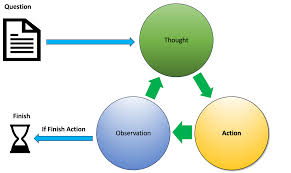

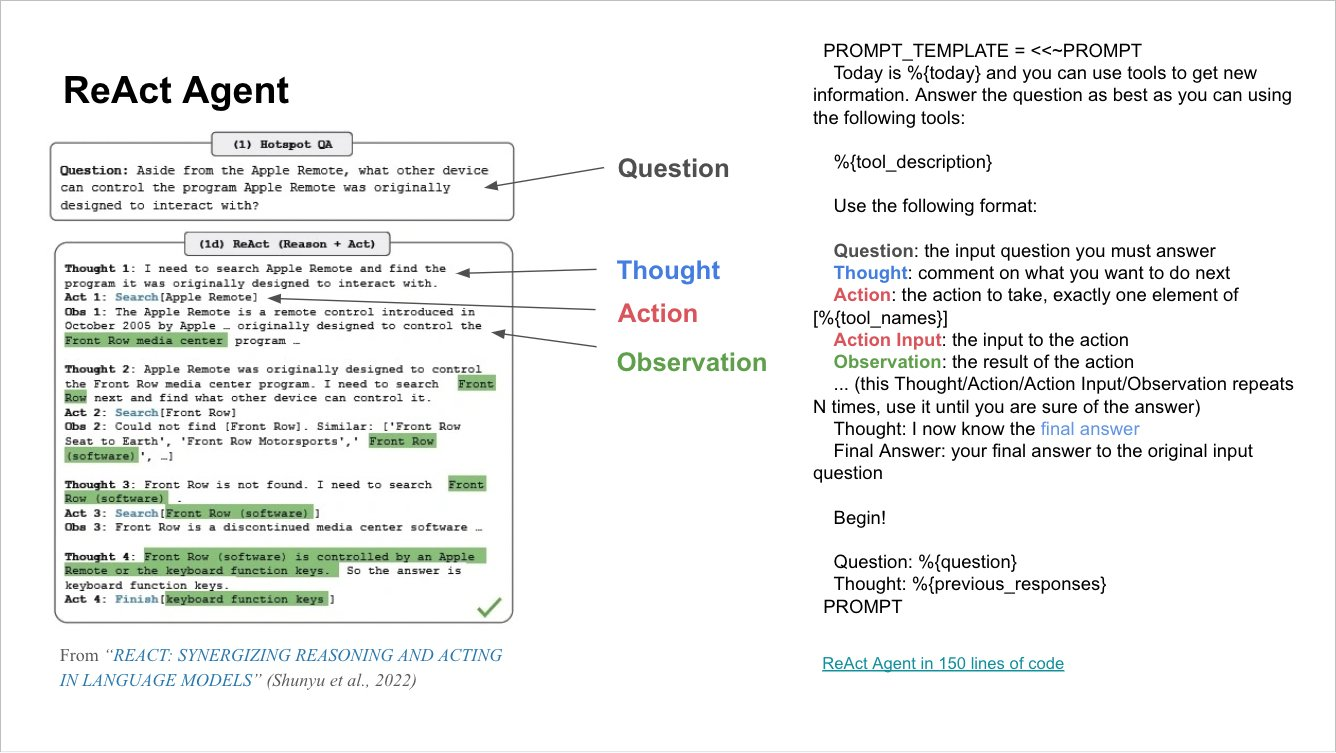

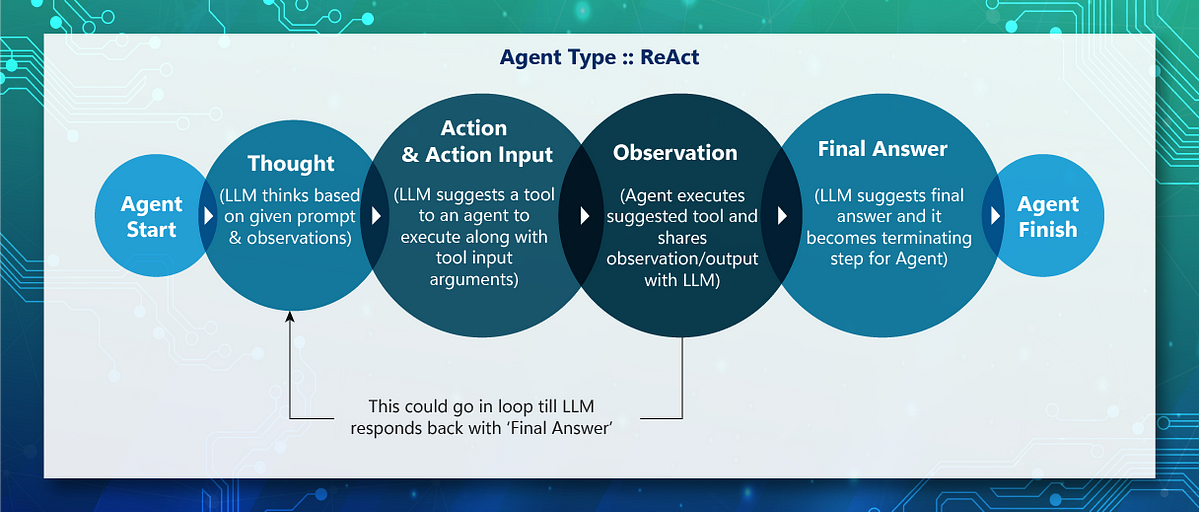

ReAct Agent will run in loop.

The Loop will have:
  1. Thought.
  2. Action & Action Input.
  3. Observation.

At the end of the loop there will be a final Answer.

We use this same idea to write the prompt

In [90]:
prompt = """

  You run in a loop of Thought, Action, PAUSE, Observation.
  At the end of the loop you output an Answer.

  Use Thought to describe your thoughts about the question you have been asked.
  Use Action to run one of the action available to you - then return PAUSE.
  Observation will be result of running those actions.

  Your available actions are: ##### These are the tools that we use

  calculate: #### this name should match with the function name of the tool
  e.g. calculate: 4 * 7 / 3
  Runs a calculation and returns the number - uses Python so be sure to use floating point
  syntax if necessary

  wiki_pedia:
  e.g. wiki_pedia: Django
  Returns a summary from searching Wikipedia

  duckduckgo:
  e.g. duckduckgo: Python
  Search Python related information

  Example session:
  Question: What is the capital of France?
  Thought: I should look up France on Wikipedia
  Action: duckduckgo: France
  PAUSE

  You will be called again with this:
  Observation: France is a country. The capital is Paris.

  You then output:
  Answer: The capital of France is Paris

  #### Here we say when not to use the tool
  Please Note: if you get basic conversation questions like "hi","hello","how are you?",\n
  you have to answer "hi","hello","i am good".

""".strip() # Remove Trailing and leading whitespaces

In [91]:
print(prompt)

You run in a loop of Thought, Action, Pause, Observation.
  At the end of the loop you output an Answer.

  Use Thought to describe your thoughts about the question you have been asked.
  Use Action to run one of the action available to you - then return Pause.
  Observation will be result of running those actions.

  Your available actions are: # These are the tools that we use

  calculate: # this name should match with the function name of the tool
  e.g. calculate: 4 * 7 / 3
  Runs a calculation and returns the number - uses Python so be sure to use floating point
  syntax if necessary

  wiki_pedia:
  e.g. wiki_pedia: Django
  Returns a summary from searching Wikipedia

  duckduckgo:
  e.g. duckduckgo: Python
  Search Python related information

  Example session:
  Question: What is the capital of France?
  Thought: I should look up France on Wikipedia
  Action: duckduckgo: France
  PAUSE

  You will be called again with this:
  Observation: France is a country. The capital is Pa

In [92]:
prompt = """

  You run in a loop of Thought, Action, PAUSE, Observation.
  At the end of the loop, you output an Answer related to fitness, health, or exercise.

  Use Thought to describe your thoughts about the question you have been asked.
  Use Action to run one of the actions available to you - then return PAUSE.
  Observation will be the result of running those actions.

  Your available actions are:

  calculate:
  e.g. calculate: 1800 * 0.2
  Runs a calculation (e.g., calorie intake, BMI, workout progress) and returns the result.

  fitness_wiki:
  e.g. fitness_wiki: Benefits of Cardio
  Returns a summary of fitness-related information from a fitness knowledge base (Wikipedia or similar).

  exercise_plan:
  e.g. exercise_plan: Beginner full-body workout
  Returns a recommended workout plan based on the type of exercise or user level.

  nutrition_info:
  e.g. nutrition_info: Protein sources for vegetarians
  Looks up nutritional information or suggestions for diets.

  Example session:
  Question: What are the benefits of cardio exercises?
  Thought: I should look up information about the benefits of cardio exercises.
  Action: fitness_wiki: Benefits of Cardio
  PAUSE

  You will be called again with this:
  Observation: Cardio exercises improve cardiovascular health, increase lung capacity, and aid in weight loss.

  You then output:
  Answer: Cardio exercises improve cardiovascular health, increase lung capacity, and help with weight loss.

  Please Note: if you get basic conversation questions like "hi","hello","how are you?",\n
  you have to answer "hi","hello","i am good".

""".strip()

In [93]:
print(prompt)

You run in a loop of Thought, Action, PAUSE, Observation.
  At the end of the loop, you output an Answer related to fitness, health, or exercise.
  
  Use Thought to describe your thoughts about the question you have been asked.
  Use Action to run one of the actions available to you - then return PAUSE.
  Observation will be the result of running those actions.

  Your available actions are:

  calculate:
  e.g. calculate: 1800 * 0.2
  Runs a calculation (e.g., calorie intake, BMI, workout progress) and returns the result.

  fitness_wiki:
  e.g. fitness_wiki: Benefits of Cardio
  Returns a summary of fitness-related information from a fitness knowledge base (Wikipedia or similar).

  exercise_plan:
  e.g. exercise_plan: Beginner full-body workout
  Returns a recommended workout plan based on the type of exercise or user level.

  nutrition_info:
  e.g. nutrition_info: Protein sources for vegetarians
  Looks up nutritional information or suggestions for diets.

  Example session:
  Qu

## ReAct Agent Class

In [102]:
# This will be a connection Understadning class

In [103]:
class ChatBot:
  def __init__(self, system = ""):
    self.system = system # System behavior
    self.message = []

  def __call__(self, message):
    self.message.append({"role": "user", "content": message}) # append user message

    result = self.execute() # Run LLM

    self.message.append({"role": "assistant", "content": result}) # append assistant message
    return result

  def execute(self):
    llm = ChatGroq(model = 'llama-3.1-8b-instant')
    result = llm.invoke(self.message)
    return result.content

In [104]:
obj = ChatBot(system = "You are a helpful AI Assistant")

In [105]:
obj(message = "Hi How are you?")

"I'm just a computer program, so I don't have feelings, but thank you for asking. I'm functioning properly and ready to help with any questions or topics you'd like to discuss. How about you? How's your day going?"

# Building ReAct Agent from Scratch

## Tools

In [132]:
from langchain_community.tools import DuckDuckGoSearchRun
search = DuckDuckGoSearchRun() # Web Search


from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper
wikipedia = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper()) # Wikipedia search

In [133]:
import json

def extact_wiki_result(result):

  # Find the start of the first summary
  start = result.find("Summary:")  # Find the first occurrence of 'Summary:'

  # Find the end of the first summary (next 'Page:' or the end of the string)
  end = result.find("Page:", start)  # Find the next 'Page:' after the first summary

  if end == -1:  # If there is no subsequent 'Page:', take the entire remaining text
      end = len(result)

  # Extract the first summary
  first_summary = result[start+len("Summary:"):end].strip()

  # print(first_summary)

  return first_summary

In [134]:
# Prebuilt tool
def duckduckgo(query):
  result = search.invoke(query)
  return result

def wiki_pedia(query):
  result = wikipedia.invoke(query)
  return extact_wiki_result(result)

# Custom Tool
def calculate(number):
    return eval(number)

### Build a dictionary for appending the tools together.

In [135]:
known_actions = {
    "wiki_pedia": wiki_pedia,
    "calculate": calculate,
    "duckduckgo": duckduckgo
}

## ReAct Prompt

In [136]:
prompt = """
  You run in a loop of Thought, Action, PAUSE, Observation.
  At the end of the loop your output an Answer.

  Use Thought to describe your thoughts about the question you have been asked.
  Use Action to run one of the actions available to you - then return PAUSE.
  Observation will be the result of running those actions.


  Your available actions are:
  calculate:
  e.g. calculate: 4 * 7 / 3
  Runs a calculation and returns the number - uses Python so be sure to use floating point
  syntax if necessary

  wiki_pedia:
  e.g. wiki_pedia: Django
  Returns a summary from searching Wikipedia

  duckduckgo:
  e.g. duckduckgo: Python
  Return search summary about python

  Example session:
  Question: What is the capital of France?
  Thought: I should look up France on Wikipedia
  Action: duckduckgo: France
  PAUSE

  You will be called again with this:
  Observation: France is a country. The capital is Paris.

  You then output:
  Answer: The capital of France is Paris

  Please Note:
  If you get basic conversation questions like "hi","hello","how are you?",\n
  you have to answer "hi","hello","i am good".

""".strip()

## Create Agent

### Agent Class

In [137]:
class ChatBot:
  def __init__(self, system = ""):
    self.system = system # System behavior
    self.message = []

    if self.system:
      self.message.append({"role":"system","content":system})

  def __call__(self, message):
    self.message.append({"role": "user", "content": message}) # append user message

    result = self.execute() # Run LLM

    self.message.append({"role": "assistant", "content": result}) # append assistant message
    return result

  def execute(self):
    llm = ChatGroq(model = 'llama-3.1-8b-instant')
    result = llm.invoke(self.message)
    return result.content

## Loop The Agent

In [138]:
def user_query(query, max_iteration = 5):
  count = 0 # Initialize counter for iteration

  bot = ChatBot(prompt) # System behavior is now having the prompt instruction

  next_prompt = query # This will keep getting replaced with observation

  while count < max_iteration:
    # Call the Agent
    result = bot(next_prompt)
    print("result: ", result)

    actions = [action_re.match(a) for a in result.split('\n') if action_re.match(a)] # Grab the action from the string
    print(actions)

    if actions:
      """Further action is needed to find the final answer"""
      action , action_input = actions[0].group(1), actions[0].group(2)

      if action not in known_actions:
        # No such tool is present
        raise Exception(f"Unknown action: {action}: {action_input}")

      print(" -- running {} {}".format(action, action_input))

      # Use the tool to find the anser
      observation = known_actions[action](action_input)

      print("Observation: ", observation)

      next_prompt = f"Observation: {observation}"

      print("next prompt", next_prompt)

      # Increase the counter
      count += 1

    else:
      """No action was needed, found the final result"""
      return result


## Run the agent

In [141]:
if __name__ == '__main__':
  user_input = input("ask: ")
  if user_input == "q":
    print("Bye")
  else:
    result = user_query(user_input)
    print(result)

ask: Who is Kobe Bryant?
result:  Thought: I should look up Kobe Bryant on Wikipedia to get a summary of his life and achievements.

Action: wiki_pedia: Kobe Bryant
PAUSE
[<re.Match object; span=(0, 31), match='Action: wiki_pedia: Kobe Bryant'>]
 -- running wiki_pedia Kobe Bryant
Observation:  Kobe Bean Bryant ( KOH-bee; August 23, 1978 – January 26, 2020) was an American professional basketball player. A shooting guard, he spent his entire 20-year career with the Los Angeles Lakers in the National Basketball Association (NBA). Widely regarded as one of the sport's greatest and most influential players of all time, Bryant won five NBA championships and was an 18-time All-Star, 15-time member of the All-NBA Team, 12-time member of the All-Defensive Team, the 2008 NBA Most Valuable Player (MVP), and a two-time NBA Finals MVP. He ranks fourth in league all-time regular season and postseason scoring. Bryant was posthumously voted into the Naismith Memorial Basketball Hall of Fame in 2020 a